In [1]:
import sys
import os

import pandas as pd
import numpy as np

In [2]:
load_ext autoreload

In [3]:
autoreload 2

This library is being developed for the purpose of this work

In [4]:
from phm08ds.data import load_data

/home/navar/anaconda3/envs/phm08ds/lib/python3.6/site-packages/phm08ds/data


The dataset is comes with the package. To load it, just call the following.

In [5]:
data = load_data.load_data(type='train')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,372.15,2388.13,8120.83,8.6216,0.03,368,2319,100.0,28.58,17.1735
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,521.81,2388.15,8132.87,8.3907,0.03,391,2388,100.0,38.99,23.3619
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,183.26,2387.95,8063.84,9.3557,0.02,334,2223,100.0,14.83,8.8555
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,314.84,2388.07,8052.30,9.2231,0.02,364,2324,100.0,24.42,14.7832
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,130.44,2387.89,8083.67,9.2986,0.02,330,2212,100.0,10.99,6.4025


### What represents each one of columns in this dataset?

- Column 0: engine unit or even the aircraft number
- Column 1: time step
- Column 2, 3 and 4: operational condition. See readme of dataset for futher details.
- Colum 5 to 26: sensor readings

## Let's take a look how the data looks like

In [6]:
from phm08ds.data.preprocessing import Data_per_unit
from phm08ds.data.preprocessing import Data_per_sensor

tf_unit_1 = Data_per_unit(unit=1)
unit_1 = tf_unit_1.fit_transform(data)

unit_1.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,372.15,2388.13,8120.83,8.6216,0.03,368,2319,100.0,28.58,17.1735
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,521.81,2388.15,8132.87,8.3907,0.03,391,2388,100.0,38.99,23.3619
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,183.26,2387.95,8063.84,9.3557,0.02,334,2223,100.0,14.83,8.8555
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,314.84,2388.07,8052.30,9.2231,0.02,364,2324,100.0,24.42,14.7832
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,130.44,2387.89,8083.67,9.2986,0.02,330,2212,100.0,10.99,6.4025


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

sns.set_style("whitegrid")
sns.set_context("notebook")

### The data is a multivariate timeseries

In [8]:
def plot_series(unit, sensor):
    tf_1 = Data_per_unit(unit=unit)
    tf_2 = Data_per_sensor(sensor=sensor)
    
    data_unit = tf_1.fit_transform(data)
    data_unit_sensor = tf_2.fit_transform(data_unit)  
    plt.figure(figsize=(30*0.39, 10*0.39))
    plt.plot(data_unit_sensor)
    
interact(plot_series, unit=(1,100,1), sensor=(1,19,1))

interactive(children=(IntSlider(value=50, description='unit', min=1), IntSlider(value=10, description='sensor'…

<function __main__.plot_series(unit, sensor)>

# Grouping data by operational conditions

According to Wang, 2008 the three operational conditions could be clustered into 6 groups like that

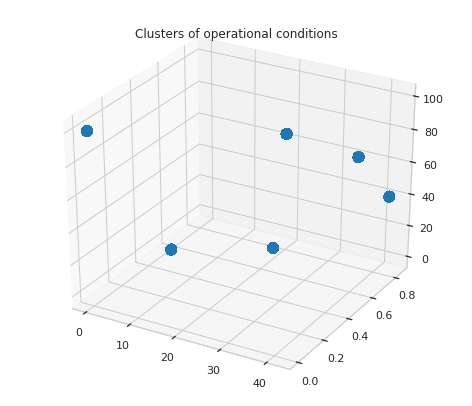

In [9]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[2], data[3], data[4], s=100)
plt.title('Clusters of operational conditions')
plt.show()

To find the cluster centers automatically we are going to use kmeans. Just for convinience.

That is the operational condition for each sample given by kmeans.

In [10]:
from phm08ds.data.preprocessing import OperationalCondition

tf_op_cond = OperationalCondition().fit(data)
op_cond = tf_op_cond.transform(data)
op_cond

array([1, 2, 0, ..., 3, 0, 4], dtype=int32)

In [11]:
data.insert(26, 'Operational_condition', op_cond)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,Operational_condition
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,2388.13,8120.83,8.6216,0.03,368,2319,100.0,28.58,17.1735,1
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,2388.15,8132.87,8.3907,0.03,391,2388,100.0,38.99,23.3619,2
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,2387.95,8063.84,9.3557,0.02,334,2223,100.0,14.83,8.8555,0
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,2388.07,8052.30,9.2231,0.02,364,2324,100.0,24.42,14.7832,5
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,2387.89,8083.67,9.2986,0.02,330,2212,100.0,10.99,6.4025,3


In [32]:
data.sort_values(by='Operational_condition').head()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,Operational_condition
22769,108,225,35.0046,0.8400,60.0,449.44,556.46,1372.81,1147.51,5.48,...,2387.99,8065.71,9.4142,0.02,336,2223,100.0,14.71,8.8638,0
5202,26,75,35.0069,0.8400,60.0,449.44,555.80,1361.25,1128.67,5.48,...,2387.97,8069.93,9.2981,0.02,333,2223,100.0,14.67,8.8984,0
44067,210,50,35.0070,0.8400,60.0,449.44,555.61,1363.97,1128.85,5.48,...,2387.80,8055.71,9.3185,0.02,333,2223,100.0,14.73,8.9125,0
5200,26,73,35.0007,0.8400,60.0,449.44,555.26,1356.37,1125.28,5.48,...,2388.07,8065.14,9.3252,0.02,334,2223,100.0,14.88,8.9444,0
15489,74,54,35.0037,0.8408,60.0,449.44,555.55,1361.78,1132.69,5.48,...,2387.97,8062.57,9.3008,0.02,335,2223,100.0,14.91,8.9074,0


# Load dataset: